In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('train1.csv')
data

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [2]:
data.isna().sum() #nan check

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [15]:
#shows correlations over 80% 
corrs = data.corr()
for i in corrs.index:
    for j in corrs.columns:
        if float(corrs[j].loc[i]) != 1.0 and float(corrs[j].loc[i]) > 0.8:
        print(j, i, corrs[j].loc[i])


waist(cm) weight(kg) 0.8302078490207631
weight(kg) waist(cm) 0.8302078490207631
LDL Cholesterol 0.8085331422946305
Cholesterol LDL 0.8085331422946305


In [3]:
data = data.drop(['id', 'waist(cm)', 'LDL'], axis=1) #drop most correlating cols and id

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#just some basic plots
fig, ax = plt.subplots(831, figsize=(40, 100))
step = 1
for i in data.columns[:-1]:
    ax = plt.subplot(8, 3, step)
    ax.set_ylabel(i)
    plt.plot(data.groupby(i)['smoking'].sum() / data.groupby(i)['smoking'].count())

    step+=1

In [4]:
#the main part of dataset analysis is here
def formation(data):
    #changing strange values to normal ones
    data['hearing(left)'] = data['hearing(left)'] - 1
    data['hearing(right)'] = data['hearing(right)'] - 1
    data['eyesight(right)'][data['eyesight(right)'] >= 2] = 2
    data['eyesight(left)'][data['eyesight(left)'] >= 2] = 2
    data['serum creatinine'][data['serum creatinine'] >= 2.5] = 2.5
    data['Urine protein'][data['Urine protein'] > 5] = 5
    #working with outliers
    alt = (data['ALT'].quantile(0.75) + abs(data['ALT'].quantile(0.25) - data['ALT'].quantile(0.75)))*5
    ast = (data['AST'].quantile(0.75) + abs(data['AST'].quantile(0.25) - data['AST'].quantile(0.75)))*5
    gtp = (data['Gtp'].quantile(0.75) + abs(data['Gtp'].quantile(0.25) - data['Gtp'].quantile(0.75)))*5
    for i in data.index:
        if data['ALT'].loc[i] > alt:
            data['ALT'].loc[i] = alt + abs(alt - data['ALT'].loc[i])**0.7
        if data['AST'].loc[i] > ast:
            data['AST'].loc[i] = ast + abs(ast - data['AST'].loc[i])**0.7
        if data['Gtp'].loc[i] > gtp:
            data['Gtp'].loc[i] = gtp + abs(gtp - data['Gtp'].loc[i])**0.7
    #adding new data
    data['BMI'] = pd.Series(np.zeros(data.shape[0]))
    for i in data.index:
        data['BMI'].iloc[i] = data['weight(kg)'].iloc[i] / (data['height(cm)'].iloc[i] / 100) ** 2
    data = data.drop('weight(kg)', axis=1) #dropped to avoid correlations
    #transforming BMI to categorical data
    data['overweight'] = pd.Series(np.zeros(data.shape[0])) 
    for i in data.index:
        if 18.5 < data['BMI'].loc[i] < 25:
            data['overweight'].iloc[i] = 1
        elif 25 <= data['BMI'].loc[i] < 30:
            data['overweight'].iloc[i] = 2
        elif 30 <= data['BMI'].loc[i] < 35:
            data['overweight'].iloc[i] = 3
        elif data['BMI'].loc[i] >= 35:
            data['overweight'].iloc[i] = 4
    data = data.drop('BMI', axis=1)
    return data
data = formation(data)

In [8]:
#One Hot Encoding
def encoding(data):
    cat_cols = data[['hearing(right)', 'hearing(left)', 'Urine protein',
                'serum creatinine', 'dental caries', 'overweight']]
    for i in cat_cols.columns:
        data = data.drop(i, axis = 1)
        data = pd.concat([data, pd.get_dummies(cat_cols[i], drop_first = True, prefix=i)], axis=1)
    return data
data_for_catboost = data
data_for_others = encoding(data)

In [10]:
data_for_catboost

,age,height(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,HDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,overweight
0,55,165,0.5,0.6,0,0,135,87,94,172,...,40,16.5,1,1.0,22.0,25.0,27.0,0,1,1.0
1,70,165,0.6,0.7,1,1,146,83,147,194,...,57,16.2,1,1.1,27.0,23.0,37.0,1,0,1.0
2,20,170,0.4,0.5,0,0,118,75,79,178,...,45,17.4,1,0.8,27.0,31.0,53.0,0,1,2.0
3,35,180,1.5,1.2,0,0,131,88,91,180,...,38,15.9,1,1.0,20.0,27.0,30.0,1,0,2.0
4,30,165,1.5,1.0,0,0,121,76,91,155,...,44,15.4,1,0.8,19.0,13.0,17.0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,1.5,2.0,0,0,127,80,64,238,...,72,14.5,1,0.8,25.0,26.0,13.0,0,0,1.0
159252,50,155,1.0,1.0,0,0,120,80,89,213,...,64,14.5,1,0.6,21.0,20.0,18.0,0,0,3.0
159253,40,160,1.5,1.0,0,0,114,70,84,189,...,87,10.9,1,0.6,15.0,9.0,12.0,0,0,1.0
159254,50,165,1.2,1.0,0,0,121,90,122,165,...,55,14.4,1,1.1,22.0,17.0,37.0,0,1,2.0


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
data_for_catboost[['eyesight(left)', 'eyesight(right)', 'hearing(right)', 'hearing(left)', 
                'Urine protein','serum creatinine', 'dental caries', 'overweight']] = data_for_catboost[['eyesight(left)',
                                                                     'eyesight(right)', 'hearing(right)', 'hearing(left)', 
                                                                       'Urine protein','serum creatinine',
                                                                            'dental caries', 'overweight']].astype('str')

In [14]:
#the first model is catboost
from catboost import CatBoostClassifier, Pool
X_train, X_test, y_train, y_test = train_test_split(data_for_catboost.drop('smoking', axis=1), 
                                                    data_for_catboost['smoking'], random_state=1, 
                                                    shuffle = True, test_size = .2)

catboost = CatBoostClassifier()
catboost.fit(X_train, y_train, 
             cat_features=['eyesight(left)', 'eyesight(right)', 'hearing(right)', 'hearing(left)', 
                           'Urine protein','serum creatinine', 'dental caries', 'overweight'])
catboost.score(X_test, y_test)

Learning rate set to 0.08163
0:	learn: 0.6524640	total: 273ms	remaining: 4m 32s
1:	learn: 0.6214462	total: 388ms	remaining: 3m 13s
2:	learn: 0.5952483	total: 471ms	remaining: 2m 36s
3:	learn: 0.5753426	total: 557ms	remaining: 2m 18s
4:	learn: 0.5584831	total: 643ms	remaining: 2m 7s
5:	learn: 0.5455515	total: 718ms	remaining: 1m 58s
6:	learn: 0.5347593	total: 800ms	remaining: 1m 53s
7:	learn: 0.5258036	total: 885ms	remaining: 1m 49s
8:	learn: 0.5184786	total: 972ms	remaining: 1m 47s
9:	learn: 0.5124038	total: 1.05s	remaining: 1m 43s
10:	learn: 0.5067166	total: 1.13s	remaining: 1m 41s
11:	learn: 0.5026917	total: 1.21s	remaining: 1m 39s
12:	learn: 0.4993414	total: 1.3s	remaining: 1m 39s
13:	learn: 0.4957255	total: 1.39s	remaining: 1m 38s
14:	learn: 0.4928080	total: 1.47s	remaining: 1m 36s
15:	learn: 0.4900227	total: 1.56s	remaining: 1m 35s
16:	learn: 0.4877211	total: 1.64s	remaining: 1m 34s
17:	learn: 0.4857385	total: 1.72s	remaining: 1m 33s
18:	learn: 0.4838101	total: 1.8s	remaining: 1m 

159:	learn: 0.4443267	total: 13.3s	remaining: 1m 9s
160:	learn: 0.4442568	total: 13.4s	remaining: 1m 9s
161:	learn: 0.4440939	total: 13.5s	remaining: 1m 9s
162:	learn: 0.4440180	total: 13.6s	remaining: 1m 9s
163:	learn: 0.4439163	total: 13.7s	remaining: 1m 9s
164:	learn: 0.4438108	total: 13.7s	remaining: 1m 9s
165:	learn: 0.4437316	total: 13.8s	remaining: 1m 9s
166:	learn: 0.4436727	total: 13.9s	remaining: 1m 9s
167:	learn: 0.4435978	total: 14s	remaining: 1m 9s
168:	learn: 0.4434868	total: 14.1s	remaining: 1m 9s
169:	learn: 0.4433994	total: 14.2s	remaining: 1m 9s
170:	learn: 0.4432881	total: 14.2s	remaining: 1m 9s
171:	learn: 0.4432234	total: 14.3s	remaining: 1m 8s
172:	learn: 0.4431294	total: 14.4s	remaining: 1m 8s
173:	learn: 0.4430262	total: 14.5s	remaining: 1m 8s
174:	learn: 0.4429726	total: 14.6s	remaining: 1m 8s
175:	learn: 0.4428608	total: 14.6s	remaining: 1m 8s
176:	learn: 0.4427527	total: 14.7s	remaining: 1m 8s
177:	learn: 0.4426542	total: 14.8s	remaining: 1m 8s
178:	learn: 0.

318:	learn: 0.4334971	total: 26.5s	remaining: 56.6s
319:	learn: 0.4334477	total: 26.6s	remaining: 56.5s
320:	learn: 0.4333990	total: 26.7s	remaining: 56.4s
321:	learn: 0.4333418	total: 26.7s	remaining: 56.3s
322:	learn: 0.4333086	total: 26.8s	remaining: 56.2s
323:	learn: 0.4332278	total: 26.9s	remaining: 56.1s
324:	learn: 0.4332254	total: 27s	remaining: 56.1s
325:	learn: 0.4331585	total: 27.1s	remaining: 56s
326:	learn: 0.4331560	total: 27.2s	remaining: 55.9s
327:	learn: 0.4331085	total: 27.2s	remaining: 55.8s
328:	learn: 0.4330630	total: 27.3s	remaining: 55.7s
329:	learn: 0.4329854	total: 27.4s	remaining: 55.6s
330:	learn: 0.4329822	total: 27.5s	remaining: 55.6s
331:	learn: 0.4329034	total: 27.6s	remaining: 55.5s
332:	learn: 0.4329018	total: 27.7s	remaining: 55.4s
333:	learn: 0.4328348	total: 27.7s	remaining: 55.3s
334:	learn: 0.4327458	total: 27.8s	remaining: 55.2s
335:	learn: 0.4326819	total: 27.9s	remaining: 55.1s
336:	learn: 0.4326333	total: 28s	remaining: 55.1s
337:	learn: 0.4325

477:	learn: 0.4258494	total: 39.6s	remaining: 43.2s
478:	learn: 0.4257972	total: 39.7s	remaining: 43.1s
479:	learn: 0.4257617	total: 39.7s	remaining: 43.1s
480:	learn: 0.4257157	total: 39.8s	remaining: 43s
481:	learn: 0.4256766	total: 39.9s	remaining: 42.9s
482:	learn: 0.4256394	total: 40s	remaining: 42.8s
483:	learn: 0.4255995	total: 40.1s	remaining: 42.7s
484:	learn: 0.4255558	total: 40.2s	remaining: 42.6s
485:	learn: 0.4255195	total: 40.2s	remaining: 42.6s
486:	learn: 0.4254564	total: 40.3s	remaining: 42.5s
487:	learn: 0.4254159	total: 40.4s	remaining: 42.4s
488:	learn: 0.4253963	total: 40.5s	remaining: 42.3s
489:	learn: 0.4253581	total: 40.6s	remaining: 42.2s
490:	learn: 0.4253060	total: 40.6s	remaining: 42.1s
491:	learn: 0.4252691	total: 40.7s	remaining: 42.1s
492:	learn: 0.4252379	total: 40.8s	remaining: 42s
493:	learn: 0.4251767	total: 40.9s	remaining: 41.9s
494:	learn: 0.4251398	total: 41s	remaining: 41.8s
495:	learn: 0.4250794	total: 41.1s	remaining: 41.7s
496:	learn: 0.425055

636:	learn: 0.4189220	total: 52.8s	remaining: 30.1s
637:	learn: 0.4189177	total: 52.8s	remaining: 30s
638:	learn: 0.4189026	total: 52.9s	remaining: 29.9s
639:	learn: 0.4188447	total: 53s	remaining: 29.8s
640:	learn: 0.4187995	total: 53.1s	remaining: 29.7s
641:	learn: 0.4187498	total: 53.2s	remaining: 29.6s
642:	learn: 0.4187129	total: 53.2s	remaining: 29.6s
643:	learn: 0.4186566	total: 53.3s	remaining: 29.5s
644:	learn: 0.4186553	total: 53.4s	remaining: 29.4s
645:	learn: 0.4186036	total: 53.5s	remaining: 29.3s
646:	learn: 0.4185735	total: 53.6s	remaining: 29.2s
647:	learn: 0.4185397	total: 53.6s	remaining: 29.1s
648:	learn: 0.4184769	total: 53.7s	remaining: 29.1s
649:	learn: 0.4184681	total: 53.8s	remaining: 29s
650:	learn: 0.4184269	total: 53.9s	remaining: 28.9s
651:	learn: 0.4183985	total: 54s	remaining: 28.8s
652:	learn: 0.4183553	total: 54.1s	remaining: 28.7s
653:	learn: 0.4183136	total: 54.1s	remaining: 28.6s
654:	learn: 0.4182774	total: 54.2s	remaining: 28.6s
655:	learn: 0.418248

798:	learn: 0.4130072	total: 1m 6s	remaining: 16.6s
799:	learn: 0.4129699	total: 1m 6s	remaining: 16.6s
800:	learn: 0.4129322	total: 1m 6s	remaining: 16.5s
801:	learn: 0.4129009	total: 1m 6s	remaining: 16.4s
802:	learn: 0.4128999	total: 1m 6s	remaining: 16.3s
803:	learn: 0.4128713	total: 1m 6s	remaining: 16.2s
804:	learn: 0.4128536	total: 1m 6s	remaining: 16.1s
805:	learn: 0.4128033	total: 1m 6s	remaining: 16.1s
806:	learn: 0.4127759	total: 1m 6s	remaining: 16s
807:	learn: 0.4127326	total: 1m 6s	remaining: 15.9s
808:	learn: 0.4126786	total: 1m 6s	remaining: 15.8s
809:	learn: 0.4126770	total: 1m 7s	remaining: 15.7s
810:	learn: 0.4126661	total: 1m 7s	remaining: 15.6s
811:	learn: 0.4126366	total: 1m 7s	remaining: 15.6s
812:	learn: 0.4125878	total: 1m 7s	remaining: 15.5s
813:	learn: 0.4125404	total: 1m 7s	remaining: 15.4s
814:	learn: 0.4125191	total: 1m 7s	remaining: 15.3s
815:	learn: 0.4124967	total: 1m 7s	remaining: 15.2s
816:	learn: 0.4124650	total: 1m 7s	remaining: 15.1s
817:	learn: 0.

954:	learn: 0.4075589	total: 1m 19s	remaining: 3.73s
955:	learn: 0.4075284	total: 1m 19s	remaining: 3.64s
956:	learn: 0.4074947	total: 1m 19s	remaining: 3.56s
957:	learn: 0.4074415	total: 1m 19s	remaining: 3.48s
958:	learn: 0.4073939	total: 1m 19s	remaining: 3.39s
959:	learn: 0.4073561	total: 1m 19s	remaining: 3.31s
960:	learn: 0.4073149	total: 1m 19s	remaining: 3.23s
961:	learn: 0.4072962	total: 1m 19s	remaining: 3.15s
962:	learn: 0.4072534	total: 1m 19s	remaining: 3.06s
963:	learn: 0.4072267	total: 1m 19s	remaining: 2.98s
964:	learn: 0.4072148	total: 1m 19s	remaining: 2.9s
965:	learn: 0.4071609	total: 1m 19s	remaining: 2.81s
966:	learn: 0.4071131	total: 1m 20s	remaining: 2.73s
967:	learn: 0.4070814	total: 1m 20s	remaining: 2.65s
968:	learn: 0.4070798	total: 1m 20s	remaining: 2.57s
969:	learn: 0.4070388	total: 1m 20s	remaining: 2.48s
970:	learn: 0.4070329	total: 1m 20s	remaining: 2.4s
971:	learn: 0.4070042	total: 1m 20s	remaining: 2.32s
972:	learn: 0.4069660	total: 1m 20s	remaining: 2

0.7858219264096447

In [64]:
#next is random forest
X_train, X_test, y_train, y_test = train_test_split(data.drop('smoking', axis=1), data['smoking'], random_state=1, shuffle = True, test_size = .2)
params_forest = {'model__n_estimators': [30, 50, 100],
         'model__max_depth': range(5, 10),
         'model__min_samples_leaf': range(3, 10)}


pipe_forest = Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier())])
grid_forest = GridSearchCV(pipe_forest, params_forest)
grid_forest.fit(X_train, y_train)
grid_forest.score(X_test, y_test)

KeyboardInterrupt: 

In [ ]:
grid_forest.best_params_

In [15]:
#also used xgboost with metric auc
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(data.drop('smoking', axis=1), data['smoking'], random_state=1, shuffle = True, test_size = .2)

params_xg = {'model__n_estimators': [300, 400, 500],
         'model__max_depth': range(1, 7)}

pipe_xg = Pipeline([('scaler', StandardScaler()), ('model', XGBClassifier(eval_metric = 'auc'))])
grid_xg = GridSearchCV(pipe_xg, params_xg)
grid_xg.fit(X_train, y_train)
grid_xg.score(X_test, y_test)

0.7867009920884089

In [16]:
grid_xg.best_params_

{'model__max_depth': 3, 'model__n_estimators': 500}

In [65]:
#the last model is knn
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(data.drop('smoking', axis=1), data['smoking'], random_state=1, shuffle = True, test_size = .2)

params_knn = {'model__n_neighbors': [50, 100, 150, 200, 250],
              'model__p': [1, 2],
              'model__weights': ['uniform', 'distance']}


pipe_knn = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier(n_jobs=10))])

grid_knn = GridSearchCV(pipe_knn, params_knn)
grid_knn.fit(X_train, y_train)
grid_knn.score(X_test, y_test)

0.7604546025367324

In [66]:
grid_knn.best_params_

{'model__n_neighbors': 100, 'model__p': 1, 'model__weights': 'distance'}

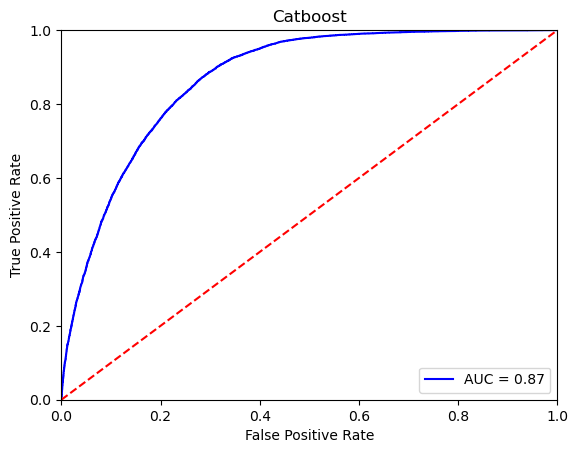

In [15]:
#here are some roc plots
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

probs = catboost.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Catboost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

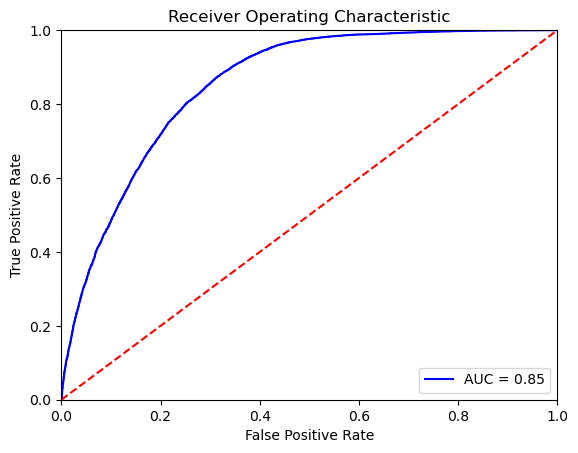

In [ ]:
probs = grid.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

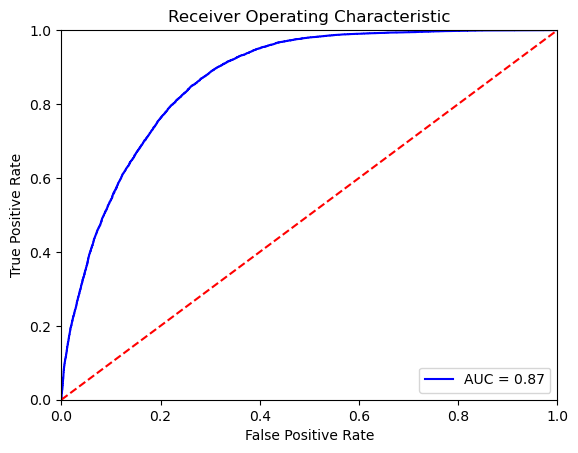

In [18]:
probs = grid_xg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('XGBoost Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

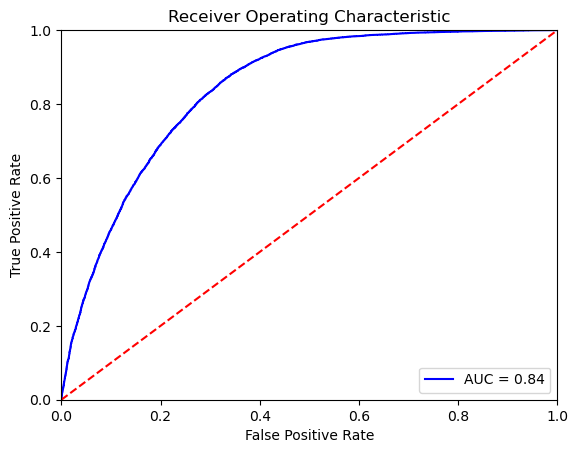

In [69]:
probs = grid_knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('K Neighbors Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
#the last step: prediction on test
t = pd.read_csv('test1.csv')
t = formation(t)
t[['eyesight(left)', 'eyesight(right)', 'hearing(right)', 'hearing(left)', 
    'Urine protein','serum creatinine', 'dental caries', 'overweight']] = t[['eyesight(left)', 'eyesight(right)', 
                                                                             'hearing(right)', 'hearing(left)', 
                                                                           'Urine protein','serum creatinine',
                                                                            'dental caries', 'overweight']].astype('str')
predict = pd.concat([t['id'], pd.DataFrame(catboost.predict_proba(t.drop(['id', 'waist(cm)', 'LDL'], axis=1)))[1]], axis=1)

predict.columns = ['id', 'smoking']
predict.to_csv('submission.csv', index=False)